# What I learnt from this project

Write what was special in the project. Don't really write everything you learnt. You probably learnt new stuff that might not be impressive for recruiters

What I learnt from this project:
* Organizing the notebook.
    * Making a copy of the dataframe at the beginning of each section ensures that I won't need to run the entire notebook when I do something wrong
    * Dividing each point to subpoints makes it much easier to follow what you've already done at this point. Unfortunetly, Kaggle makes it harder by only displaying H1s & H2s in the table of content.
    * Adding notes of what, how, and why I'm doing or going to do something.
* Combining the two columns (`company` & `agent`) to reduce the overall missing values in both columns.
    * However, I didn't do what I wrote down I would. Beneath the markdown table I wrote I would do something while I applied a different and much simpler solution.

What is impressive for recruiters:
* 


Next project's objectives:
- [ ] Create a `pipeline` for all the categorical encoding steps.
- [ ] How to use the `category` datatype properly.
- [ ] Apply continous encoding for time
- [ ] Look more into the outliers and how to better handle them instead of removing them immediately

# 1. Problem Definiation

# 2. Data Collection

You can find the data dictionary for the dataset in this [repo](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md). The project's name is 2020-02-11.

In [512]:
pip install pycountry-convert

Note: you may need to restart the kernel to use updated packages.


In [513]:
pip install --upgrade seaborn 

Note: you may need to restart the kernel to use updated packages.


In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Correcting data types
from datetime import datetime
# Categorical Encoding
from sklearn.preprocessing import OrdinalEncoder
import pycountry_convert as pc

pd.set_option("display.max_columns", None)

In [515]:
print(sns.__version__)

0.13.2


In [516]:
original_df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [517]:
original_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [518]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 3. Data Cleaning

- [x] Handling missing values
- [x] Removing duplicates
- [x] Correcting data types
- [x] Handling imbalanced data
- [x] Categorical encoding
- [x] Handling outliers
- [x] Feature engineering
- [ ] Standardizing and normalizing data

## Handling missing values

In [519]:
df_missing_values = original_df.copy()

In [520]:
df_missing_values.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Investigating `company` column
Looking into dropping the `company` column since it has a lot of missing values. Over 94% of the feature is missing.

At first, we need to ask ourselves if this column is important to us in the first place? Would it have negative impact on the predictive power of the model? Is it a big enought negative impact considering the effort that's gonna be put into solving this problem?

The answer is propably will have little to no impact on the evalution metrics. That is the case since `company` is just an identifier column. Yes, it doesn't necessarly mean the column is useless. It can help in finding patterns in the target column when they share the same company, for example.

However, after doing some basic descriptive statistical analysis. We find that:

Although it wouldn't affect our model's learning to remove it, I'm still going to attempt to shrink the number of missing values for the sake of practicing data preprocessing in case it does matter in other datasets.

In [521]:
df_missing_values["company"].value_counts().sort_values(ascending=False).head(10)

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
174.0    149
219.0    141
281.0    138
154.0    133
405.0    119
Name: count, dtype: int64

In [522]:
# Average bookings for each company
df_missing_values["company"].value_counts().mean()

19.30965909090909

In [1]:
# Median bookings for each company
df_missing_values["company"].value_counts().median()

NameError: name 'df_missing_values' is not defined

In [524]:
# Percentage of missing values in the `company` column
(df_missing_values["company"].isna().sum() / len(df_missing_values)) * 100

94.30689337465449

In [525]:
rows_without_missing_company = df_missing_values[~df_missing_values["company"].isna()]

In [526]:
# Are all record with a `company` value has a null value in `agent` column?
rows_without_missing_company["agent"].isna().sum() == len(rows_without_missing_company)

False

After reading the data dictionary, it turns out both `company` and `agent` are ID columns for the entity that made the booking. 

We can combine both columns to reduce the number of missing values in the both columns. It turns out we can find an ID for most of the missing values in `compnay` if we used the values in the `agent` column.

But first, want to make sure that there's exactly one ID per record. 

Unfortuently, turns out this is not the case. Most of the records have one ID. However there are rows with no ID, while others have both of columns regestired.

In [527]:
# Records with exactly one ID
len(df_missing_values[(df_missing_values["company"].isna()) ^ (df_missing_values["agent"].isna())])

109413

In [528]:
# Records with a missing value in `agent`, but with a existing value in `company`
len(df_missing_values[(~df_missing_values["company"].isna()) & (df_missing_values["agent"].isna())])

6580

In [529]:
# Records with a missing value in `company`, but with a existing value in `agent`
len(df_missing_values[(~df_missing_values["agent"].isna()) & (df_missing_values["company"].isna())])

102833

In [530]:
# Records with both IDs.
len(df_missing_values[~(df_missing_values["company"].isna()) & ~(df_missing_values["agent"].isna())])

217

In [531]:
# Records with no ID.
len(df_missing_values[(df_missing_values["company"].isna()) & (df_missing_values["agent"].isna())])

9760

In [533]:
# Records with both IDs.
rows_with_two_ids = df_missing_values[~(df_missing_values["company"].isna()) & ~(df_missing_values["agent"].isna())]
rows_with_two_ids.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16


In [534]:
rows_with_two_ids.groupby("agent")["company"].value_counts()

agent  company
5.0    250.0       1
7.0    395.0       1
9.0    9.0        11
       333.0       9
       273.0       1
       301.0       1
       312.0       1
       313.0       1
       379.0       1
       421.0       1
       478.0       1
14.0   14.0        2
       84.0        1
       229.0       1
       361.0       1
27.0   132.0       1
40.0   40.0        3
45.0   45.0        1
85.0   85.0        1
139.0  99.0        4
143.0  436.0       2
146.0  184.0       1
159.0  412.0       1
184.0  146.0       3
       126.0       1
185.0  281.0      78
195.0  417.0       1
196.0  61.0        1
223.0  223.0       1
240.0  268.0       3
       331.0       2
       113.0       1
       360.0       1
242.0  242.0       1
250.0  399.0       4
       419.0       1
       439.0       1
       442.0       1
       485.0       1
       499.0       1
290.0  148.0       7
       186.0       1
314.0  29.0        2
324.0  324.0       9
326.0  281.0       5
328.0  281.0       9
334.0  281.0      2

In [535]:
rows_with_two_ids.groupby("company")["agent"].value_counts()

company  agent
9.0      9.0      11
14.0     14.0      2
29.0     314.0     2
40.0     40.0      3
45.0     45.0      1
61.0     196.0     1
84.0     14.0      1
85.0     85.0      1
99.0     139.0     4
113.0    240.0     1
126.0    184.0     1
132.0    27.0      1
146.0    184.0     3
148.0    290.0     7
184.0    146.0     1
186.0    290.0     1
223.0    223.0     1
229.0    14.0      1
242.0    242.0     1
250.0    5.0       1
268.0    240.0     3
273.0    9.0       1
281.0    185.0    78
         334.0    28
         328.0     9
         326.0     5
301.0    9.0       1
312.0    9.0       1
313.0    9.0       1
324.0    324.0     9
331.0    240.0     2
333.0    9.0       9
360.0    240.0     1
361.0    14.0      1
379.0    9.0       1
395.0    7.0       1
399.0    250.0     4
405.0    405.0     5
412.0    159.0     1
417.0    195.0     1
419.0    250.0     1
421.0    9.0       1
436.0    143.0     2
439.0    250.0     1
442.0    250.0     1
444.0    444.0     1
478.0    9.0       

Let's list all the possible scenarios before combining the two columns:
|agent|company|solution|count|
|:-:|:-:|:-:|:-:|
|exists|exists|Use value in agent<sup>*</sup>|217|
|exists|missing|Use value in agent|102833|
|missing|missing|Drop row|9760|
|missing|exists|Use the mode<sup>**</sup>|6580|

*There is a problem resides in the case in which both columns has values. The relationship between both columns is *many-to-many*. Hence, We'll find the same value from `company` sharing multiple `agent` values. Thankfully, when aggregated by `company`(see cell above), we find that there's only one `company` ID (281) that shares multiple `agent` IDs. We can even reduce the wasted rows by using the most common `agent` value, which will cut our loses in half.

In [536]:
# 1. Select rows with missing `agent` & existing `comapny`
df_company_exists = df_missing_values[(df_missing_values["agent"].isna()) & (~df_missing_values["company"].isna())]

In [537]:
# 2. Find the mode `agent` for each `company` value
for value in df_company_exists["company"].unique():
    print(value, df_missing_values[df_missing_values["company"] == value]["agent"].mode().values)

110.0 []
113.0 [240.]
270.0 []
178.0 []
240.0 []
154.0 []
144.0 []
307.0 []
268.0 [240.]
59.0 []
204.0 []
312.0 [9.]
318.0 []
94.0 []
174.0 []
274.0 []
195.0 []
223.0 [223.]
317.0 []
281.0 [185.]
118.0 []
53.0 []
286.0 []
12.0 []
47.0 []
342.0 []
373.0 []
371.0 []
383.0 []
86.0 []
82.0 []
218.0 []
88.0 []
31.0 []
397.0 []
392.0 []
331.0 [240.]
367.0 []
20.0 []
83.0 []
416.0 []
51.0 []
395.0 [7.]
102.0 []
34.0 []
84.0 [14.]
360.0 [240.]
405.0 [405.]
394.0 []
457.0 []
382.0 []
461.0 []
478.0 [9.]
386.0 []
112.0 []
486.0 []
421.0 [9.]
9.0 [9.]
308.0 []
135.0 []
224.0 []
504.0 []
269.0 []
356.0 []
498.0 []
390.0 []
513.0 []
203.0 []
263.0 []
477.0 []
521.0 []
169.0 []
515.0 []
445.0 []
337.0 []
251.0 []
428.0 []
292.0 []
388.0 []
130.0 []
355.0 []
254.0 []
543.0 []
531.0 []
528.0 []
62.0 []
120.0 []
42.0 []
81.0 []
116.0 []
530.0 []
103.0 []
39.0 []
16.0 []
92.0 []
501.0 []
165.0 []
291.0 []
290.0 []
43.0 []
325.0 []
192.0 []
108.0 []
200.0 []
465.0 []
287.0 []
297.0 []
490.0 []
482.0 []
2

In [538]:
company_value = 9

# I love the fact that I was able to overcomplicate something that simple. It looks beautiful tbh.
# Next line will produce an error in case the `company` value is `np.nan`
print(df_missing_values[df_missing_values["company"] == company_value].groupby("company")["agent"].apply(lambda x: x.mode()).iloc[0])

print(df_missing_values[df_missing_values["company"] == company_value]["agent"].mode()[0])

9.0
9.0


In [539]:
# The naive way of doing it.
def combined_id(row):
    # Both columns exist
    if pd.notna(row["agent"]) and pd.notna(row["company"]):
        return row["agent"]

    # `company` is missing
    elif pd.notna(row["agent"]) and pd.isna(row["company"]): 
        return row["agent"]

    # `agent` is missing
    elif pd.isna(row["agent"]) and pd.notna(row["company"]): 
        mode_list = df_missing_values[df_missing_values["company"] == row["company"]]["agent"]
        
        return mode_list[0] if mode_list.empty else np.nan
    
    # Both columns are missing
    elif pd.isna(row["agent"]) and pd.isna(row["company"]): 
        # Can I delete the row from here?
        return np.nan

df_missing_values["booking_id"] = df_missing_values.apply(combined_id, axis=1)

In [540]:
df_missing_values[["company", "agent", "booking_id"]].iloc[10:20]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,company,agent,booking_id
10,NaN,240.0,240.0
11,NaN,240.0,240.0
12,NaN,240.0,240.0
13,NaN,241.0,241.0
14,NaN,241.0,241.0
15,NaN,240.0,240.0
16,NaN,8.0,8.0
17,NaN,240.0,240.0
18,110.0,NaN,NaN
19,NaN,250.0,250.0


In [ ]:
all_rows = df_missing_values.shape[0]

In [2]:
# Records with exactly one ID
one_id_rows = len(df_missing_values[(df_missing_values["company"].isna()) ^ (df_missing_values["agent"].isna())])

NameError: name 'df_missing_values' is not defined

In [3]:
no_id_rows = df_missing_values["booking_id"].isna().sum()

NameError: name 'df_missing_values' is not defined

In [543]:
(all_rows-no_id_rows)/all_rows

0.910796706058695

<p style="font-size: 32px; color:red;"> This is wrong </p>

> I need to calculte how many missing values was before combining the columnsIn order to assume you removed the following percentage of missing values.

> Moreover, the missing values have increased. This is not the rows with missing values in both columns, there are circa 5 more thousands added to the number from before.

<s>We now have removed <u>**91%**</u> of the missing values in both column.</s>

<s>The 9760 rows remined are the records with no values in both columns. Which we can easily drop.</s>

In [544]:
df_missing_values.drop(["agent", "company"], axis=1, inplace=True)


While at it, we will drop the rows with missing `country` values as well. Since we won't be able to impute those with any values.

In [545]:
df_missing_values.dropna(subset=["booking_id", "country", "children"], inplace=True)

In [546]:
df_missing_values.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Removing Duplicates

That's a lot of duplication in the dataset. Over quarter of the dataset is duplicated.

In [547]:
df_removing_duplicates = df_missing_values.copy()

In [548]:
df_removing_duplicates.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_id
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,304.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,303.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,240.0


In [549]:
duplicated = df_removing_duplicates.duplicated()

In [550]:
# Raw number
duplicated.sum()

27823

In [551]:
# Percentage from the whole dataset
duplicated.sum() / len(df_removing_duplicates)

0.2704044939452252

In [552]:
# Rows left after removing duplicates
df_removing_duplicates.shape[0]

102894

## Correcting data types

From comparing the datatypes of the columns with the values stored in the dataframe we observe:
1. `is_canceled` and `is_repeated_guest` should be `bool` instead of `int64`
2. Most the numerical features can be stored in `uint8`(max of 255) instead of `int64`. With only a few would need `int16` or `uint16`.
4. \[Note to self\] The two features `reserved_room_type` and `assigned_room_type` are categorical that can be converted to numbers and be saved with `int8`. But I'd like to leave categorical features alont for know until I review converting categorical feature lesson. Who knows, I might use one hot encoding at the end.

The memory usage for the dataset when imported (notice the `df.info()` at the begging of the notebook) is 18.3 MB. While after converting the data types to a smaller yet covers the needed range, the memory have been reduced t 11.0 MB. A 60% decrease in the allocated memory.

In [553]:
df_dtypes_converted = df_removing_duplicates.copy()

In [554]:
pd.DataFrame({'Max': df_dtypes_converted.describe().loc["max"], 'Min': df_dtypes_converted.describe().loc["min"]})

,Max,Min
is_canceled,1.0,0.00
lead_time,629.0,0.00
arrival_date_year,2017.0,2015.00
arrival_date_week_number,53.0,1.00
arrival_date_day_of_month,31.0,1.00
stays_in_weekend_nights,16.0,0.00
stays_in_week_nights,41.0,0.00
adults,26.0,0.00
children,10.0,0.00
babies,10.0,0.00


In [555]:
conversion_dict = {
    "hotel": "string",
    "is_canceled": "boolean",
    "lead_time": np.int16 ,
    # Need the arrival_* data in string to append them together later on
    "arrival_date_year": "string",
    "arrival_date_month": "string",
    "arrival_date_week_number": "string",
    "arrival_date_day_of_month": "string",
    "stays_in_weekend_nights": np.int8 ,
    "stays_in_week_nights": np.int8 ,
    "adults": np.int8 ,
    "children": np.float16,
    "babies": np.int8 ,
    "meal": "string",
    "country": "string",
    "market_segment": "string",
    "distribution_channel": "string",
    "is_repeated_guest": "boolean" ,
    "previous_cancellations": np.int8 ,
    "previous_bookings_not_canceled": np.int8 ,
    "reserved_room_type": "string",
    "assigned_room_type": "string",
    "booking_changes": np.int8 ,
    "deposit_type": "string",
    "days_in_waiting_list": np.int8 ,
    "customer_type": "string",
    "adr": np.float16,
    "required_car_parking_spaces": np.int8 ,
    "total_of_special_requests": np.int8 ,
    "reservation_status": "string",
    "reservation_status_date": "string",
    "booking_id": np.float16,
}

In [556]:
df_dtypes_converted = df_dtypes_converted.astype(conversion_dict, errors="ignore")

In [10]:
print(pd.Int64Dtype == np.int64)
print(pd.StringDtype == str)
print(pd.StringDtype == np.str_)
print(np.str_ == str)
print(pd.BooleanDtype == bool)

False
False
False
False
False


### Testing out `convert_dtypes`

In [557]:
# `convert_dtypes` made it much easier than choosing a dtype for each column by hand
# However, it does not use the smallest possible data type. Instead it uses the largest data type which eats lots of memory
df_auto_convert = df_removing_duplicates.convert_dtypes()
df_auto_convert.info()

### Converting `string` to `category`

Trying this later since it seems converting to `category` has its own set of problems.

Read [this](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to get more informed about what is `category` and its intricacies.

```
df_category_columns = df_dtypes_converted.select_dtypes(include="string").astype("category")

df_without_strings = df_dtypes_converted.select_dtypes(exclude="string")

df_dtypes_converted = pd.concat([df_without_strings, df_category_columns])
```

In [558]:
df_dtypes_converted.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_id
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,False,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,304.0
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0
7,Resort Hotel,False,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,False,0,0,C,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,303.0
8,Resort Hotel,True,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,240.0


In [559]:
df_dtypes_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  string 
 1   is_canceled                     102894 non-null  boolean
 2   lead_time                       102894 non-null  int16  
 3   arrival_date_year               102894 non-null  string 
 4   arrival_date_month              102894 non-null  string 
 5   arrival_date_week_number        102894 non-null  string 
 6   arrival_date_day_of_month       102894 non-null  string 
 7   stays_in_weekend_nights         102894 non-null  int8   
 8   stays_in_week_nights            102894 non-null  int8   
 9   adults                          102894 non-null  int8   
 10  children                        102894 non-null  float16
 11  babies                          102894 non-null  int8   
 12  meal                 

## Handling Imbalanced Data

Handling imbalanced data deals with the target variable.

A 70-30 split should be fine. Don't forget to check the recall, precision, and AUC when training the model.

This just popped up in my head. Imbalanced data can only be categorical data. This comes from the definition of imblanced data essentialy. Of course, numerical data has its own set of problems such as skewness.

In [560]:
df_imbalanced_data = df_dtypes_converted.copy()

<Axes: xlabel='is_canceled', ylabel='percent'>

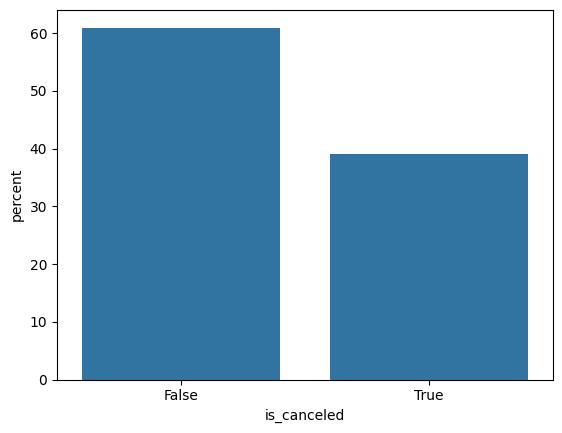

In [561]:
sns.countplot(df_imbalanced_data, x="is_canceled", stat="percent")

In [562]:
df_imbalanced_data["is_canceled"].value_counts(normalize=True)

is_canceled
False    0.609686
True     0.390314
Name: proportion, dtype: Float64

## Categorical Encoding

- [x] `hotel` can be a boolean feature
    * I believe the best course of action is to try creating two models. One with the `hotel` converted to a binary column. The other in which `hotel` is one-hot encoded. And see which model will yield a better result.
- [x] `reserved_room_type`, `assigned_room_type`, and `meal` are ordinal features
- [x] `market_segment`, `distribution_channel`, `deposit_type`, `customer_type`, and `reservation_status` should be one-hot encoded
- [ ] [Advanced] Try using a continous encoding style to encode time. Because time should be treated as a cyclic pattern. But, when Using something like ordinal encoding, we find ourselves giving Jan a value of 1, while assiging 12 to Dec. This will make it hard for some models like distance-based models. I found this detailed [article](https://harrisonpim.com/blog/the-best-way-to-encode-dates-times-and-other-cyclical-features) on the matter.

***Questions:***
- [x] Is there any order to `deposit_type`?
    * I don't think so. Doesn't seem to have a logical order. It's just the natural sequence of types.
- [x] Should `country` be dropped?
    * Since we're only practicing data preprocessing, we don't need to do anything to the column. However, dealing with it will be vital when creating a preditive model. Since the column is skewed and is of high cardinality.

In [563]:
df_categorical_encoding = df_imbalanced_data.copy()

In [564]:
df_categorical_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  string 
 1   is_canceled                     102894 non-null  boolean
 2   lead_time                       102894 non-null  int16  
 3   arrival_date_year               102894 non-null  string 
 4   arrival_date_month              102894 non-null  string 
 5   arrival_date_week_number        102894 non-null  string 
 6   arrival_date_day_of_month       102894 non-null  string 
 7   stays_in_weekend_nights         102894 non-null  int8   
 8   stays_in_week_nights            102894 non-null  int8   
 9   adults                          102894 non-null  int8   
 10  children                        102894 non-null  float16
 11  babies                          102894 non-null  int8   
 12  meal                 

In [565]:
df_categorical_encoding.select_dtypes(include="string").head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
3,Resort Hotel,2015,July,27,1,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,2015,July,27,1,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
5,Resort Hotel,2015,July,27,1,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
7,Resort Hotel,2015,July,27,1,FB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-03
8,Resort Hotel,2015,July,27,1,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-05-06


### Converting `hotel` into a binary column

In [566]:
sorted(df_categorical_encoding["hotel"].unique())

['City Hotel', 'Resort Hotel']

In [ ]:
# Converting `hotel` column into a binary column
df_categorical_encoding["is_city_hotel"] = (df_categorical_encoding["hotel"] == "City Hotel")
df_categorical_encoding.drop(["hotel"], axis=1, inplace=True)

### Converting Ordinal Categorical Columns

Which are `reserved_room_type`, `assigned_room_type`, and `meal`

In [567]:
sorted(df_categorical_encoding["reserved_room_type"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [568]:
sorted(df_categorical_encoding["assigned_room_type"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K']

In [569]:
sorted(df_categorical_encoding["meal"].unique())

['BB', 'FB', 'HB', 'SC', 'Undefined']

In [570]:
reserved_room_type_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'P']], dtype=np.int8)
df_categorical_encoding["reserved_room_type"] = reserved_room_type_encoder.fit_transform(df_categorical_encoding["reserved_room_type"].to_numpy().reshape(-1, 1))

assigned_room_type_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'P']], dtype=np.int8)
df_categorical_encoding["assigned_room_type"] = assigned_room_type_encoder.fit_transform(df_categorical_encoding["assigned_room_type"].to_numpy().reshape(-1, 1))

# No more 'Undefined' in the column, since 'Undefined' and 'SC' are equavilant per the data dicionary
df_categorical_encoding.loc[df_categorical_encoding['meal'] == 'Undefined', 'meal'] = 'SC'

meal_encoder = OrdinalEncoder(categories=[['SC', 'BB', 'HB', 'FB']], dtype=np.int8)
df_categorical_encoding["meal"] = meal_encoder.fit_transform(df_categorical_encoding["meal"].to_numpy().reshape(-1, 1))

### Converting Nominal Categorical Columns

In [571]:
df_categorical_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102894 non-null  boolean
 1   lead_time                       102894 non-null  int16  
 2   arrival_date_year               102894 non-null  string 
 3   arrival_date_month              102894 non-null  string 
 4   arrival_date_week_number        102894 non-null  string 
 5   arrival_date_day_of_month       102894 non-null  string 
 6   stays_in_weekend_nights         102894 non-null  int8   
 7   stays_in_week_nights            102894 non-null  int8   
 8   adults                          102894 non-null  int8   
 9   children                        102894 non-null  float16
 10  babies                          102894 non-null  int8   
 11  meal                            102894 non-null  int8   
 12  country              

In [572]:
# Select all nominal columns, except `country` since it has a lot of unique values
nominal_columns = ['market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
transformed_nominal_columns = pd.get_dummies(df_categorical_encoding[nominal_columns])

# Dropping old columns before adding the converted ones
df_categorical_encoding = df_categorical_encoding.drop(nominal_columns, axis=1)
df_categorical_encoding = pd.concat([df_categorical_encoding, transformed_nominal_columns], axis=1)

In [573]:
nominal_columns

Index(['market_segment', 'distribution_channel', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [574]:
df_categorical_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102894 non-null  boolean
 1   lead_time                       102894 non-null  int16  
 2   arrival_date_year               102894 non-null  string 
 3   arrival_date_month              102894 non-null  string 
 4   arrival_date_week_number        102894 non-null  string 
 5   arrival_date_day_of_month       102894 non-null  string 
 6   stays_in_weekend_nights         102894 non-null  int8   
 7   stays_in_week_nights            102894 non-null  int8   
 8   adults                          102894 non-null  int8   
 9   children                        102894 non-null  float16
 10  babies                          102894 non-null  int8   
 11  meal                            102894 non-null  int8   
 12  country              

### Handling `country` Column

There are different methods to deal with such high cardinality in columns.

1. Use target or frequency encoding to convert it to a numerical feature.
2. Grouping Rare Categories.
3. Use domain-knowledge. (e.g. divide the countries into continients can deem usefulness)
4. Drop the column.

I'll move on through the project using the dataframe generated from using the third solution. But, all the solutions should be tested to know for a fact what is the best solution.

- [ ] Test out all the solutions using a ML mode and record the results.

In [575]:
country_grouped_df = df_categorical_encoding.groupby("country")["is_canceled"].sum().sort_values(ascending=False)
country_grouped_df.head(10)

country
PRT    23725
GBR     2353
ESP     2168
FRA     1897
ITA     1331
DEU     1212
IRL      831
BRA      827
USA      498
BEL      469
Name: is_canceled, dtype: Int64

In [576]:
country_grouped_df.shape[0]

174

In [577]:
# Mean number of cancellation per country
mean_cancelation_frequency = np.floor(country_grouped_df.mean())
mean_cancelation_frequency

230.0

In [578]:
# Median number of cancellation per country
median_cancelation_frequency = country_grouped_df.median()
median_cancelation_frequency

4.0

In [579]:
top_cancelling_countries = country_grouped_df[country_grouped_df > mean_cancelation_frequency].sort_values(ascending=False)

In [580]:
print("How many countries are above the average?", len(top_cancelling_countries))
print("Among how many countries?", df_categorical_encoding["country"].nunique())

How many countries are above the average? 15
Among how many countries? 174


<Axes: xlabel='country'>

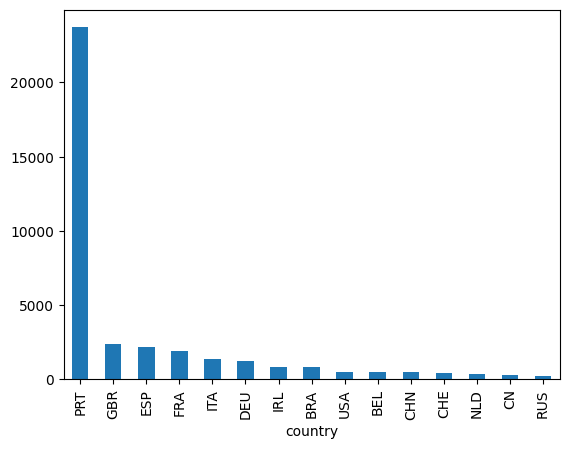

In [581]:
top_cancelling_countries.plot(kind="bar")

In [582]:
# Top 20 cancelling countries account for over 92% of booking cancelation
top_cancelling_countries.sum() / df_categorical_encoding["is_canceled"].sum()

0.9230845845471976

In [583]:
df_categorical_encoding['country'].isna().sum()

0

#### 1. Use Frequency Encoding

In [584]:
df_encoding_solution = df_categorical_encoding.copy()

In [585]:
# Applying frequency encoding (Probably couldn't handle the missing values, so dtype conversion failed)
df_encoding_solution["cancellation_frequency"] = df_categorical_encoding['country'].map(country_grouped_df.to_dict()).astype(np.int16, errors='ignore')

Instead of just using frequency encoding. I'd like to add a little of information to the column by calculating the percentage of cancelltion to the total number of booking requests.

In [586]:
# Count of each category
df_country_count = df_encoding_solution["country"].value_counts()
df_encoding_solution["cancellation_count"] = df_categorical_encoding['country'].map(df_country_count.to_dict()).astype(np.int16, errors='ignore')

In [587]:
df_encoding_solution["cancellation_percentage"] = df_encoding_solution["cancellation_frequency"] / df_encoding_solution["cancellation_count"]

In [588]:
df_encoding_solution[["cancellation_frequency", "cancellation_count", "cancellation_percentage"]]

,cancellation_frequency,cancellation_count,cancellation_percentage
3,2353,10889,0.216090
4,2353,10889,0.216090
5,2353,10889,0.216090
7,23725,-27945,-0.848989
8,23725,-27945,-0.848989
...,...,...,...
119385,469,2156,0.217532
119386,1897,9810,0.193374
119387,1212,6998,0.173192
119388,2353,10889,0.216090


In [589]:
df_encoding_solution["cancellation_percentage"].describe()

count    102894.000000
mean         -0.150430
std           0.534906
min          -0.848989
25%          -0.848989
50%           0.193374
75%           0.255673
max           1.000000
Name: cancellation_percentage, dtype: float64

In [590]:
df_encoding_solution.drop(["cancellation_count", "country"], axis=1, inplace=True)

#### 2. Grouping Rare Categories

In [591]:
df_grouping_solution = df_categorical_encoding.copy()
# Copying `cancellation_percentage` from the previous solution
df_grouping_solution["cancellation_percentage"] = df_encoding_solution["cancellation_percentage"].copy()

In [592]:
df_grouping_solution.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,booking_id,is_city_hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,cancellation_percentage
3,False,13,2015,July,27,1,0,1,1,0.0,0,1,GBR,False,0,0,0,0,0,0,75.0,0,0,2015-07-02,304.0,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,0.216090
4,False,14,2015,July,27,1,0,2,2,0.0,0,1,GBR,False,0,0,0,0,0,0,98.0,0,1,2015-07-03,240.0,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,0.216090
5,False,14,2015,July,27,1,0,2,2,0.0,0,1,GBR,False,0,0,0,0,0,0,98.0,0,1,2015-07-03,240.0,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,0.216090
7,False,9,2015,July,27,1,0,2,2,0.0,0,3,PRT,False,0,0,2,2,0,0,103.0,0,1,2015-07-03,303.0,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,-0.848989
8,True,85,2015,July,27,1,0,3,2,0.0,0,1,PRT,False,0,0,0,0,0,0,82.0,0,1,2015-05-06,240.0,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,True,False,False,-0.848989


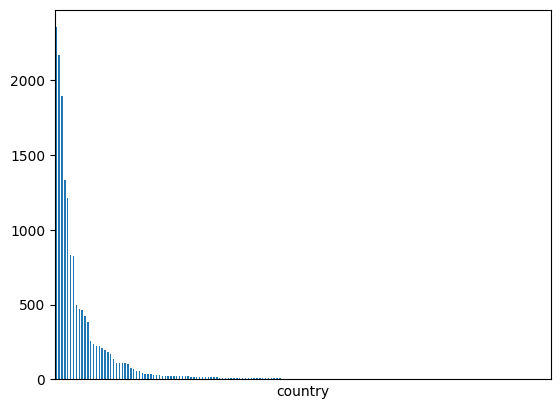

In [593]:
# Plotting country count without Portugal (the most common cacelling country)
country_grouped_df.iloc[1:].plot(kind="bar")
plt.xticks([])
plt.show()

In [594]:
# 3rd quartile number of cancellation percentage per country
thrid_quartile = df_grouping_solution["cancellation_percentage"].quantile(0.75).round(2)
thrid_quartile

0.26

Use the cancellation percentage from the section before to determine the rare class. Any country with less cancellation rate than the 3rd quartile will be considered as rare.

In [595]:
df_grouping_solution.loc[df_grouping_solution["cancellation_percentage"] < thrid_quartile, "country"] = "Rare"

In [596]:
# Even after grouping the rare countries together, it's still a high number of categories
df_grouping_solution["country"].nunique()

92

#### 3. Domain Knowledge

In [597]:
df_continent_conversion = df_categorical_encoding.copy()

In [598]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return country_continent_code
    except KeyError:
        return np.nan

In [599]:
is_country_name_length_2 = df_continent_conversion["country"].apply(len) == 2
df_continent_conversion[is_country_name_length_2]["country"].value_counts()

country
CN    1239
Name: count, dtype: Int64

In [600]:
# Turns out country name for ISO-2 CN is China, while ISO-3 is CHN
df_continent_conversion.loc[is_country_name_length_2, "country"] = "CHN"

In [601]:
df_continent_conversion["continent"] = df_continent_conversion["country"].apply(country_to_continent).astype("string")

In [602]:
df_continent_conversion["continent"].value_counts()

continent
EU    92567
AS     4268
SA     2519
NA     2127
AF      929
OC      477
Name: count, dtype: Int64

In [603]:
# Only using the countries from `top_cacelling_countries` dataframe, What are the most cancelling continents?
pd.Series(top_cancelling_countries.index).apply(country_to_continent).value_counts()

country
EU    11
SA     1
NA     1
AS     1
Name: count, dtype: int64

In [604]:
# There are few values turned into NaN because of the country `TMP` which isn't a country code 
print(df_continent_conversion["continent"].value_counts().sum())
print(df_continent_conversion["continent"].shape[0])

102887
102894


In [605]:
df_continent_conversion.drop(["country"], axis=1, inplace=True)
df_continent_conversion.dropna(subset=["continent"], inplace=True)

In [606]:
df_continent_conversion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102887 entries, 3 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102887 non-null  boolean
 1   lead_time                       102887 non-null  int16  
 2   arrival_date_year               102887 non-null  string 
 3   arrival_date_month              102887 non-null  string 
 4   arrival_date_week_number        102887 non-null  string 
 5   arrival_date_day_of_month       102887 non-null  string 
 6   stays_in_weekend_nights         102887 non-null  int8   
 7   stays_in_week_nights            102887 non-null  int8   
 8   adults                          102887 non-null  int8   
 9   children                        102887 non-null  float16
 10  babies                          102887 non-null  int8   
 11  meal                            102887 non-null  int8   
 12  is_repeated_guest    

#### 4. Dropping column

In [607]:
df_dropping_country = df_categorical_encoding.copy()

In [608]:
df_dropping_country.drop("country", axis=1, inplace=True)

#### 5. Choose Solution

I'll go for the third solution for now.

In [609]:
df_categorical_encoding = df_continent_conversion.copy()

### Cyclic Encoding

## Handling Outliers

In [610]:
df_outliers = df_categorical_encoding.copy()

In [611]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102887 entries, 3 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102887 non-null  boolean
 1   lead_time                       102887 non-null  int16  
 2   arrival_date_year               102887 non-null  string 
 3   arrival_date_month              102887 non-null  string 
 4   arrival_date_week_number        102887 non-null  string 
 5   arrival_date_day_of_month       102887 non-null  string 
 6   stays_in_weekend_nights         102887 non-null  int8   
 7   stays_in_week_nights            102887 non-null  int8   
 8   adults                          102887 non-null  int8   
 9   children                        102887 non-null  float16
 10  babies                          102887 non-null  int8   
 11  meal                            102887 non-null  int8   
 12  is_repeated_guest    

In [612]:
df_numerical_columns = df_outliers.select_dtypes(exclude=["bool", "datetime64[ns]", "string", "category", "object"])
df_non_numerical_columns = df_outliers.select_dtypes(include=["bool", "datetime64[ns]", "string", "category", "object"])

In [613]:
# This caused a very weird and odd problem where some columns' entire values were wiped out and replaced by pandas' NA
# df_outliers = pd.concat([df_numerical_columns, df_non_numerical_columns])

In [614]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102887 entries, 3 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102887 non-null  boolean
 1   lead_time                       102887 non-null  int16  
 2   arrival_date_year               102887 non-null  string 
 3   arrival_date_month              102887 non-null  string 
 4   arrival_date_week_number        102887 non-null  string 
 5   arrival_date_day_of_month       102887 non-null  string 
 6   stays_in_weekend_nights         102887 non-null  int8   
 7   stays_in_week_nights            102887 non-null  int8   
 8   adults                          102887 non-null  int8   
 9   children                        102887 non-null  float16
 10  babies                          102887 non-null  int8   
 11  meal                            102887 non-null  int8   
 12  is_repeated_guest    

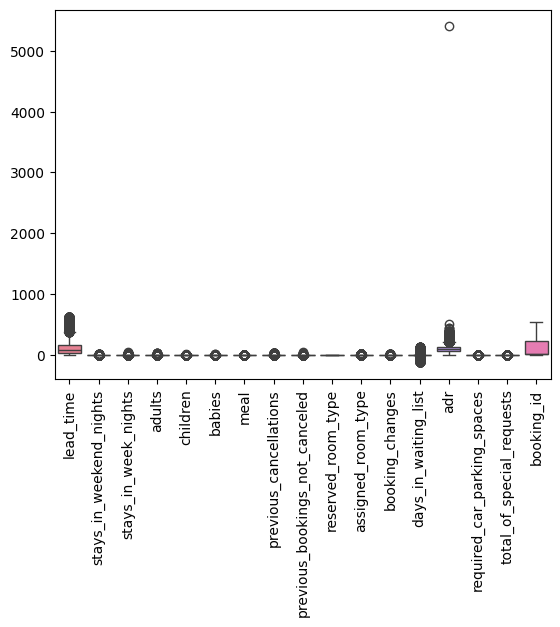

In [615]:
sns.boxplot(df_numerical_columns)
plt.xticks(rotation=90)
plt.show()

Remove all outliers using the IQR

In [616]:
df_outliers_test = df_outliers.copy()
for col in df_numerical_columns.columns:
    Q1 = df_outliers_test[col].quantile(0.25)
    Q3 = df_outliers_test[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col=} {Q1=} {Q3=} {IQR=} {lower_bound=} {upper_bound=}")

    rows_before = df_outliers_test.shape[0]
    df_outliers_test = df_outliers_test[(df_outliers_test[col]>=lower_bound) & (df_outliers_test[col]<=upper_bound)]
    rows_after = df_outliers_test.shape[0]
    print(f"Column {col} eliminated {rows_before - rows_after}")
    print()

col='lead_time' Q1=26.0 Q3=169.0 IQR=143.0 lower_bound=-188.5 upper_bound=383.5
Column lead_time eliminated 2576

col='stays_in_weekend_nights' Q1=0.0 Q3=2.0 IQR=2.0 lower_bound=-3.0 upper_bound=5.0
Column stays_in_weekend_nights eliminated 233

col='stays_in_week_nights' Q1=1.0 Q3=3.0 IQR=2.0 lower_bound=-2.0 upper_bound=6.0
Column stays_in_week_nights eliminated 2802

col='adults' Q1=2.0 Q3=2.0 IQR=0.0 lower_bound=2.0 upper_bound=2.0
Column adults eliminated 21035

col='children' Q1=0.0 Q3=0.0 IQR=0.0 lower_bound=0.0 upper_bound=0.0
Column children eliminated 6595

col='babies' Q1=0.0 Q3=0.0 IQR=0.0 lower_bound=0.0 upper_bound=0.0
Column babies eliminated 596

col='meal' Q1=1.0 Q3=1.0 IQR=0.0 lower_bound=1.0 upper_bound=1.0
Column meal eliminated 18624

col='previous_cancellations' Q1=0.0 Q3=0.0 IQR=0.0 lower_bound=0.0 upper_bound=0.0
Column previous_cancellations eliminated 3583

col='previous_bookings_not_canceled' Q1=0.0 Q3=0.0 IQR=0.0 lower_bound=0.0 upper_bound=0.0
Column previo

From the previous experiment, I should look into `adults` and `meal` since there's around 40K records removed because of them.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


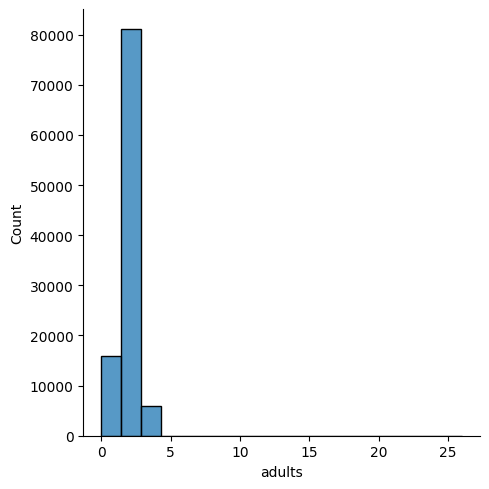

In [617]:
sns.displot(df_outliers, x="adults")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


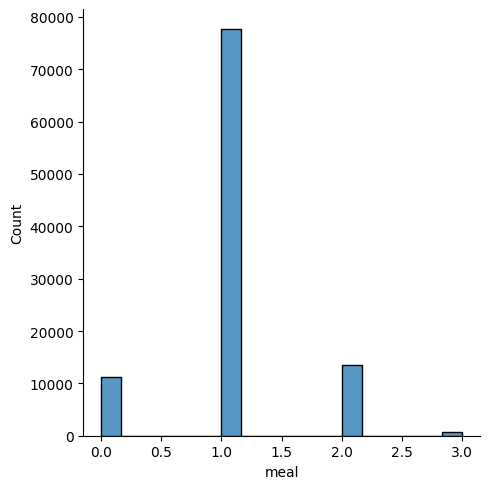

In [618]:
sns.displot(df_outliers, x="meal")
plt.show()

The mistake I made is I tried to eliminate the outliers in categorical features like `meal` and `adults`. Even though they are represnted in numbers, they should be treated as categorical features not continus numerical feautres.

In [619]:
numerical_continous_features = ["lead_time", "adr"]

df_outliers_test = df_outliers.copy()
for col in numerical_continous_features:
    Q1 = df_outliers_test[col].quantile(0.25)
    Q3 = df_outliers_test[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col=} {Q1=} {Q3=} {IQR=} {lower_bound=} {upper_bound=}")

    rows_before = df_outliers_test.shape[0]
    df_outliers_test = df_outliers_test[(df_outliers_test[col]>=lower_bound) & (df_outliers_test[col]<=upper_bound)]
    rows_after = df_outliers_test.shape[0]
    print(f"Column {col} eliminated {rows_before - rows_after}")
    print()

col='lead_time' Q1=26.0 Q3=169.0 IQR=143.0 lower_bound=-188.5 upper_bound=383.5
Column lead_time eliminated 2576

col='adr' Q1=74.125 Q3=129.0 IQR=54.875 lower_bound=-8.1875 upper_bound=211.3125
Column adr eliminated 3422



In [620]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102887 entries, 3 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102887 non-null  boolean
 1   lead_time                       102887 non-null  int16  
 2   arrival_date_year               102887 non-null  string 
 3   arrival_date_month              102887 non-null  string 
 4   arrival_date_week_number        102887 non-null  string 
 5   arrival_date_day_of_month       102887 non-null  string 
 6   stays_in_weekend_nights         102887 non-null  int8   
 7   stays_in_week_nights            102887 non-null  int8   
 8   adults                          102887 non-null  int8   
 9   children                        102887 non-null  float16
 10  babies                          102887 non-null  int8   
 11  meal                            102887 non-null  int8   
 12  is_repeated_guest    

## Feature Engineering

* Should creating `booking_id` from `comapny` and `agent` considered feature engineering?
* Look more into `market_segment`, `distribution_channel`. See if there hold the same values.


Suggestions:
1. Merge`previous_cancellations` and `previous_bookings_not_cancelled` to reduce the dimensionality of the data.

In [621]:
df_feature_engineered = df_outliers.copy()

### Creating `arrival_date` column

In [622]:
df_feature_engineered['reservation_status_date'] = pd.to_datetime(df_feature_engineered['reservation_status_date'])

In [623]:
def convert_month_name(month_name):
    date_object = datetime.strptime(month_name, '%B')
    return date_object.month

# Converting the month name into a number using `datetime`
# Then, casting the datatype to `string`
df_feature_engineered['arrival_date_month'] = df_feature_engineered['arrival_date_month'].apply(convert_month_name).astype('string')
# Format it to look similar to `reservation_status_date`
df_feature_engineered['arrival_date'] = df_feature_engineered['arrival_date_year'] + '-' + df_feature_engineered['arrival_date_month'] + '-' + df_feature_engineered['arrival_date_day_of_month']
df_feature_engineered['arrival_date'] = pd.to_datetime(df_feature_engineered['arrival_date'])
df_feature_engineered['arrival_date'].head()

3   2015-07-01
4   2015-07-01
5   2015-07-01
7   2015-07-01
8   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [624]:
df_feature_engineered.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1, inplace=True)

In [625]:
df_feature_engineered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102887 entries, 3 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     102887 non-null  boolean       
 1   lead_time                       102887 non-null  int16         
 2   stays_in_weekend_nights         102887 non-null  int8          
 3   stays_in_week_nights            102887 non-null  int8          
 4   adults                          102887 non-null  int8          
 5   children                        102887 non-null  float16       
 6   babies                          102887 non-null  int8          
 7   meal                            102887 non-null  int8          
 8   is_repeated_guest               102887 non-null  boolean       
 9   previous_cancellations          102887 non-null  int8          
 10  previous_bookings_not_canceled  102887 non-null  int8        